In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('downsampled_data.csv')

# Separate predictors and target variable
X = data.drop(columns=['RFL_Att'])  # Drop target variable
y = data['RFL_Att']  # Target variable

# Preprocess for Model 1: Keep SYNOPCode as numerical
X_numerical = X.copy()

# Preprocess for Model 2: Convert SYNOPCode to categorical (one-hot encoding)
X_categorical = pd.get_dummies(X, columns=['SYNOPCode'], drop_first=True)

# Split data (same split for fair comparison)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, _, _ = train_test_split(X_categorical, y, test_size=0.2, random_state=42)

# Train Random Forest for Model 1
rf_numerical = RandomForestRegressor(random_state=42)
rf_numerical.fit(X_train_num, y_train)
predictions_num = rf_numerical.predict(X_test_num)

# Train Random Forest for Model 2
rf_categorical = RandomForestRegressor(random_state=42)
rf_categorical.fit(X_train_cat, y_train)
predictions_cat = rf_categorical.predict(X_test_cat)

# Evaluate Model 1
rmse_num = np.sqrt(mean_squared_error(y_test, predictions_num))
r2_num = r2_score(y_test, predictions_num)

# Evaluate Model 2
rmse_cat = np.sqrt(mean_squared_error(y_test, predictions_cat))
r2_cat = r2_score(y_test, predictions_cat)

# Compare results
print("Model 1 (Numerical SYNOPCode):")
print(f"RMSE: {rmse_num:.4f}, R²: {r2_num:.4f}")

print("\nModel 2 (Categorical SYNOPCode):")
print(f"RMSE: {rmse_cat:.4f}, R²: {r2_cat:.4f}")

# Optionally: Save results for reporting
results = pd.DataFrame({
    'Model': ['Numerical', 'Categorical'],
    'RMSE': [rmse_num, rmse_cat],
    'R²': [r2_num, r2_cat]
})
results.to_csv('model_comparison_results.csv', index=False)


Model 1 (Numerical SYNOPCode):
RMSE: 0.8177, R²: 0.9529

Model 2 (Categorical SYNOPCode):
RMSE: 0.8305, R²: 0.9514


The recommendation to proceed with Model 1 (numerical SYNOPCode) is based on a balance between performance metrics and computational efficiency. Here’s a deeper explanation:

1. Performance Advantage
Model 1 (numerical) slightly outperforms Model 2 (categorical) in terms of:
Root Mean Squared Error (RMSE): Lower RMSE indicates that the model's predictions are closer to the actual values, meaning better accuracy. For Model 1, RMSE is 0.8177 compared to 0.8305 for Model 2.
R² score: Higher R² indicates that the model explains more variance in the target variable. For Model 1, R² is 0.9529 compared to 0.9514 for Model 2. While the difference is small, Model 1 consistently performs better.
This small performance advantage suggests that treating SYNOPCode as numerical allows the model to make better splits within decision trees, potentially because the numerical interpretation aligns better with the data structure in this case.

2. Computational Efficiency
Treating SYNOPCode as numerical significantly reduces the computational overhead compared to categorical encoding. Here's why:
In Model 2 (categorical), one-hot encoding creates a new binary column for each unique value in SYNOPCode. This increases the dimensionality of the dataset, leading to:
Larger memory usage.
Longer training times for the Random Forest model.
In contrast, Model 1 retains the single SYNOPCode column, keeping the dataset compact and the training process faster.
If the dataset has many unique SYNOPCode values, the computational cost of categorical encoding can grow substantially, making Model 1 much more practical.

3. Domain-Specific Considerations
While numerical encoding offers better performance and efficiency, it's crucial to consider domain knowledge about the SYNOPCode variable:
If SYNOPCode represents distinct categories (e.g., weather types) with no inherent order or numerical relationship, treating it as numerical might mislead the model by imposing artificial ordinal relationships. For example, if SYNOPCode values are arbitrary (e.g., 1, 2, 3 for "Rain", "Snow", "Sunny"), the model might interpret "2" (Snow) as being "closer" to "1" (Rain) than "3" (Sunny), which is not accurate.
If SYNOPCode has meaningful numerical relationships (e.g., higher numbers indicate greater severity or a measurable scale), treating it as numerical aligns with its actual interpretation and makes the model's behavior more meaningful.
Conclusion
The choice to proceed with Model 1 is pragmatic due to its slightly better accuracy and lower computational cost. However, you should confirm the nature of the SYNOPCode variable:

If it represents categories without a meaningful numeric relationship, Model 2 (categorical) might be more appropriate despite the slight drop in performance.
If SYNOPCode has a meaningful numeric interpretation, Model 1 (numerical) is both efficient and accurate.
Would you like to explore additional experiments, such as a hybrid encoding approach (e.g., ordinal encoding or target encoding), to further validate the findings?

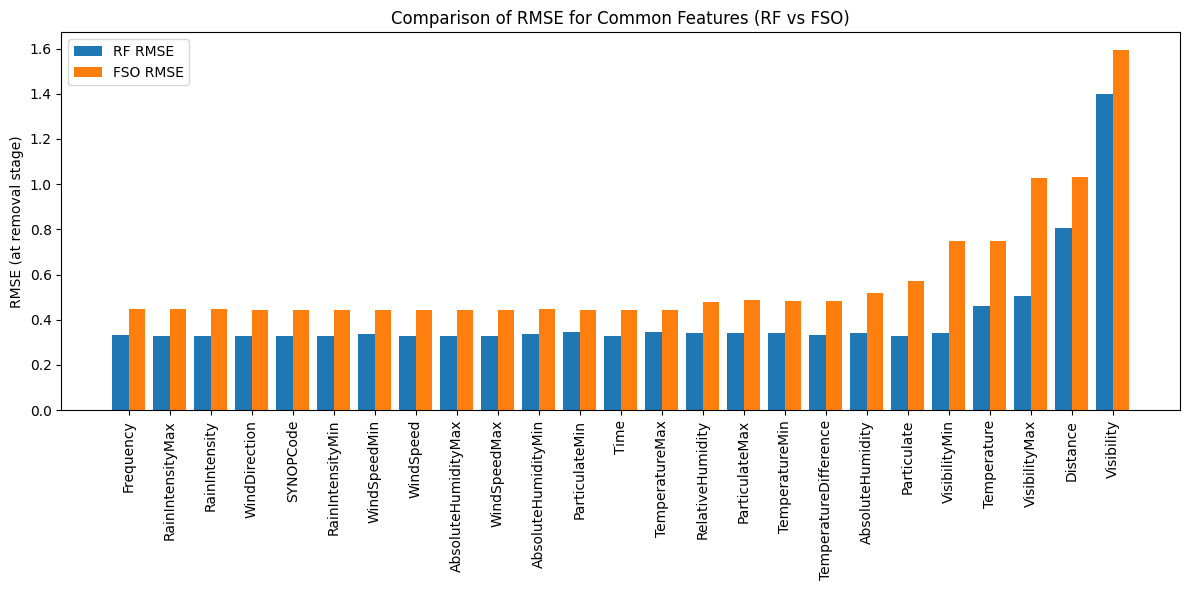

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Common features
common_features = [
    'Frequency', 'RainIntensityMax', 'RainIntensity', 'WindDirection',
    'SYNOPCode', 'RainIntensityMin', 'WindSpeedMin', 'WindSpeed',
    'AbsoluteHumidityMax', 'WindSpeedMax', 'AbsoluteHumidityMin',
    'ParticulateMin', 'Time', 'TemperatureMax', 'RelativeHumidity',
    'ParticulateMax', 'TemperatureMin', 'TemperatureDifference',
    'AbsoluteHumidity', 'Particulate', 'VisibilityMin', 'Temperature',
    'VisibilityMax', 'Distance', 'Visibility'
]

# RMSE values for RF and FSO
rf_rmse = [
    0.332605, 0.329725, 0.329101, 0.326682, 0.329555, 0.328179, 0.337480,
    0.329555, 0.328179, 0.329555, 0.337480, 0.344982, 0.328179, 0.344982,
    0.342552, 0.341822, 0.341822, 0.332421, 0.341822, 0.328179, 0.340790,
    0.462058, 0.503253, 0.806316, 1.397991
]

fso_rmse = [
    0.446146, 0.446534, 0.446301, 0.444925, 0.442625, 0.442756, 0.441372,
    0.442175, 0.442175, 0.441372, 0.447408, 0.442756, 0.445221, 0.445221,
    0.476691, 0.485650, 0.483991, 0.480835, 0.518794, 0.573057, 0.747869,
    0.748740, 1.025289, 1.030311, 1.592362
]

# Create a DataFrame for easier manipulation
data = {
    'Feature': common_features,
    'RF_RMSE': rf_rmse,
    'FSO_RMSE': fso_rmse
}
df = pd.DataFrame(data)

# Plot the comparison
plt.figure(figsize=(12, 6))
x = range(len(common_features))
plt.bar(x, df['RF_RMSE'], width=0.4, label='RF RMSE', align='center')
plt.bar([i + 0.4 for i in x], df['FSO_RMSE'], width=0.4, label='FSO RMSE', align='center')
plt.xticks([i + 0.2 for i in x], df['Feature'], rotation=90)
plt.ylabel('RMSE (at removal stage)')
plt.title('Comparison of RMSE for Common Features (RF vs FSO)')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


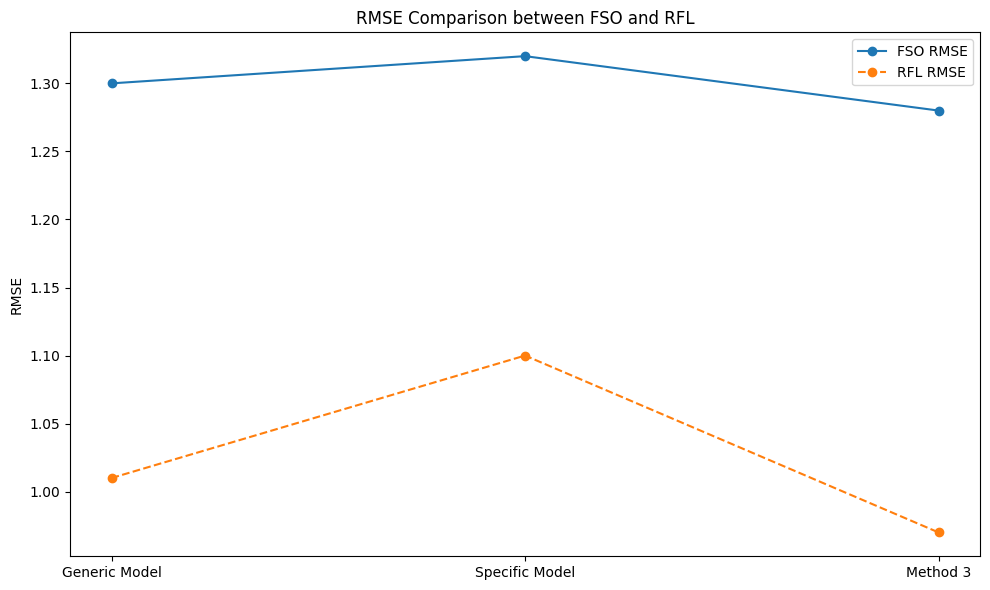

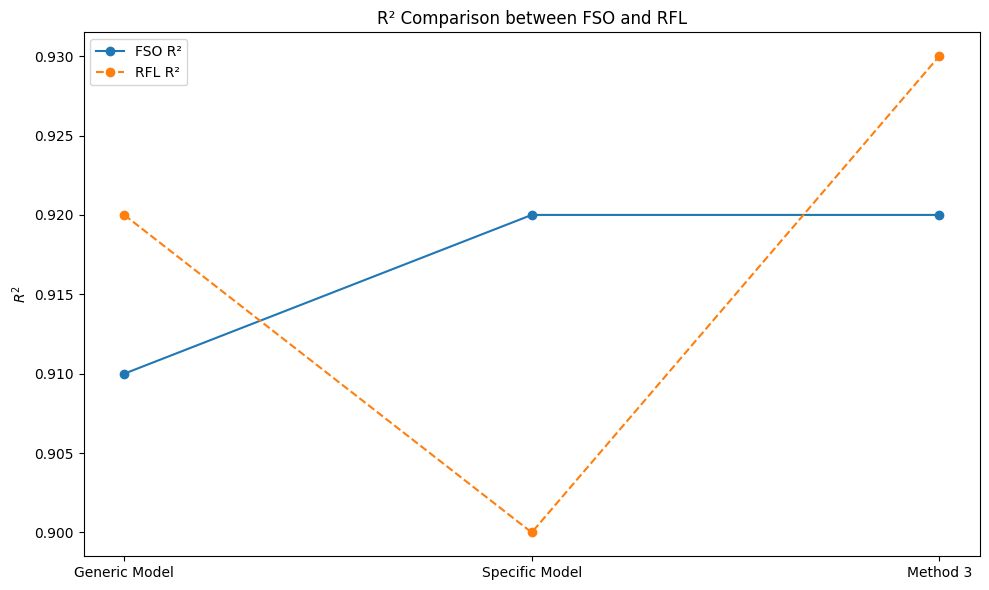

In [7]:
import matplotlib.pyplot as plt

# Data for the metrics
categories = ['Generic Model', 'Specific Model', 'Method 3']
rmse_fso = [1.30, 1.32, 1.28]
rmse_rfl = [1.01, 1.10, 0.97]
r2_fso = [0.91, 0.92, 0.92]
r2_rfl = [0.92, 0.90, 0.93]

# Plotting RMSE comparison
plt.figure(figsize=(10, 6))
plt.plot(categories, rmse_fso, marker='o', label='FSO RMSE', linestyle='-')
plt.plot(categories, rmse_rfl, marker='o', label='RFL RMSE', linestyle='--')
plt.ylabel('RMSE')
plt.title('RMSE Comparison between FSO and RFL')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting R² comparison
plt.figure(figsize=(10, 6))
plt.plot(categories, r2_fso, marker='o', label='FSO R²', linestyle='-')
plt.plot(categories, r2_rfl, marker='o', label='RFL R²', linestyle='--')
plt.ylabel('$R^2$')
plt.title('R² Comparison between FSO and RFL')
plt.legend()
plt.tight_layout()
plt.show()


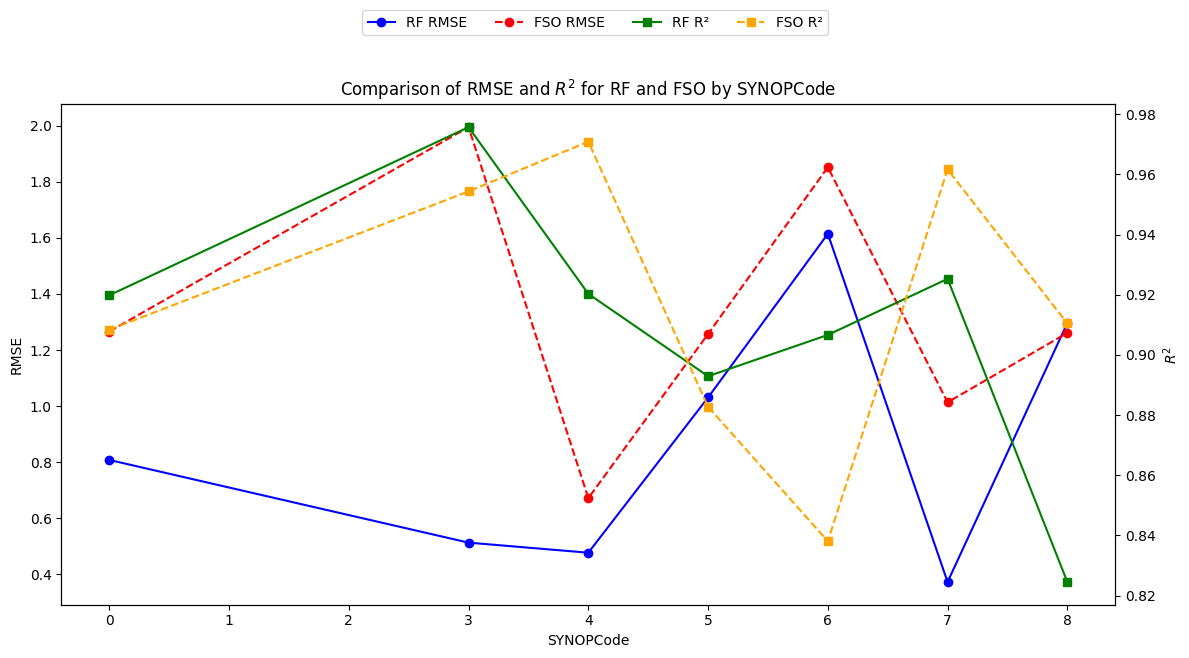

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for RF
rf_data = {
    'SYNOPCode': [0, 3, 4, 5, 6, 7, 8],
    'RMSE': [0.807341, 0.512278, 0.476312, 1.030383, 1.614367, 0.371834, 1.296258],
    'R2': [0.919827, 0.975674, 0.920288, 0.892920, 0.906646, 0.925283, 0.824554]
}

# Data for FSO
fso_data = {
    'SYNOPCode': [0, 3, 4, 5, 6, 7, 8],
    'RMSE': [1.265765, 1.995117, 0.671047, 1.257053, 1.851971, 1.013183, 1.260876],
    'R2': [0.908368, 0.954339, 0.970858, 0.882759, 0.838100, 0.961638, 0.910451]
}

# Convert to pandas DataFrame
rf_df = pd.DataFrame(rf_data)
fso_df = pd.DataFrame(fso_data)

# Plotting RMSE and R² for RF and FSO
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot RMSE with different colors
ax1.plot(rf_df['SYNOPCode'], rf_df['RMSE'], marker='o', label='RF RMSE', linestyle='-', color='blue')
ax1.plot(fso_df['SYNOPCode'], fso_df['RMSE'], marker='o', label='FSO RMSE', linestyle='--', color='red')
ax1.set_xlabel('SYNOPCode')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='y')

# Create a second y-axis for R² with different colors
ax2 = ax1.twinx()
ax2.plot(rf_df['SYNOPCode'], rf_df['R2'], marker='s', label='RF R²', linestyle='-', color='green')
ax2.plot(fso_df['SYNOPCode'], fso_df['R2'], marker='s', label='FSO R²', linestyle='--', color='orange')
ax2.set_ylabel('$R^2$')
ax2.tick_params(axis='y')

# Add legends and title
fig.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.1))
plt.title('Comparison of RMSE and $R^2$ for RF and FSO by SYNOPCode')

# Layout adjustment
fig.tight_layout()
plt.show()


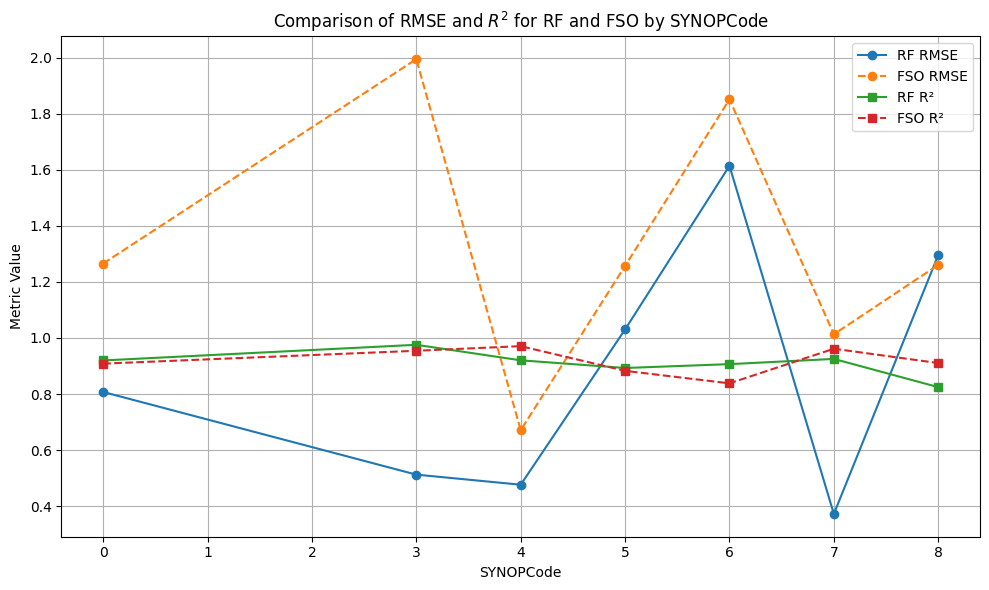

In [11]:
import matplotlib.pyplot as plt

# Data
synop_codes = [0, 3, 4, 5, 6, 7, 8]
rmse_rf = [0.807341, 0.512278, 0.476312, 1.030383, 1.614367, 0.371834, 1.296258]
rmse_fso = [1.265765, 1.995117, 0.671047, 1.257053, 1.851971, 1.013183, 1.260876]
r2_rf = [0.919827, 0.975674, 0.920288, 0.892920, 0.906646, 0.925283, 0.824554]
r2_fso = [0.908368, 0.954339, 0.970858, 0.882759, 0.838100, 0.961638, 0.910451]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(synop_codes, rmse_rf, marker='o', label='RF RMSE', linestyle='-')
plt.plot(synop_codes, rmse_fso, marker='o', label='FSO RMSE', linestyle='--')
plt.plot(synop_codes, r2_rf, marker='s', label='RF R²', linestyle='-')
plt.plot(synop_codes, r2_fso, marker='s', label='FSO R²', linestyle='--')

# Labels and Title
plt.xlabel('SYNOPCode')
plt.ylabel('Metric Value')
plt.title('Comparison of RMSE and $R^2$ for RF and FSO by SYNOPCode')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


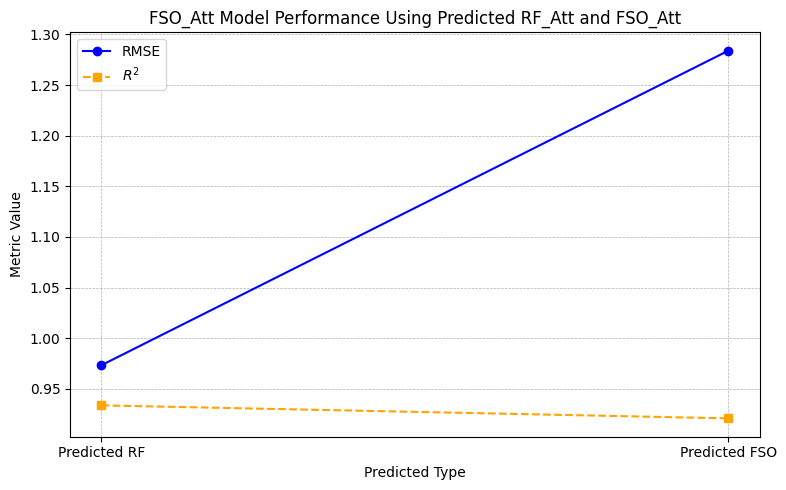

In [13]:
import matplotlib.pyplot as plt

# Data for the graph
categories = ['Predicted RF', 'Predicted FSO']
rmse_values = [0.9733, 1.2839]
r2_values = [0.9336, 0.9208]

# X-axis positions
x = range(len(categories))

# Plotting the line graph
plt.figure(figsize=(8, 5))
plt.plot(x, rmse_values, marker='o', linestyle='-', label='RMSE', color='blue')
plt.plot(x, r2_values, marker='s', linestyle='--', label='$R^2$', color='orange')

# X-axis labels
plt.xticks(x, categories)

# Adding labels, title, and legend
plt.xlabel('Predicted Type')
plt.ylabel('Metric Value')
plt.title('Model 3 Performance Using Predicted RF_Att and FSO_Att')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the graph
plt.tight_layout()
plt.show()
